# GATE SIMULATION
###                              data preprocessing
                                                 made by Yangsuseong

In [1]:
import os, glob, csv, codecs
import shutil
import re
import itertools
import math

## 파일 골라내기
    dat_dir 과 슬라이싱 범위는 상황에 따라 변경해야함

In [2]:
#dat_dir = input("Insert Directory : ")
dat_dir = r"C:\Users\BraveHong\Documents\gate_git3"

dat_file_list = glob.glob(dat_dir + '/*.txt')
dat_file_list.sort()
print(dat_file_list)
print(dat_file_list[0][-20:])

['C:\\Users\\BraveHong\\Documents\\gate_git3\\testCoincidences.txt']
testCoincidences.txt


## 파일 읽어들여서 x,y,z 축 값만 남기고 다 버릴거야
    9, 10, 11, 32,33,34 번째 정보
    인덱스로는 8,9,10  31,32,33
        dat_list 리스트에 저장(x1,y1,z1,x2,y2,z2)

In [3]:
# 리스트 청크 함수 (리스트, 원하는 길이)
# 이거 하고나면 차원이 하나가 더 생겨서 언패킹함수를 사용하여 차원축소를 해야함
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

In [4]:
# 언패킹(차원 축소)을 위한 함수
def chain(*iterables):
    # chain('ABC', 'DEF') --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element


In [5]:
dat_list_all = []
dat_list_pre = []
dat_list = []
dat_list_xyz = []


#print("--------------" + dat_file_list[i]) + "----------------")
print(str(len(dat_file_list)) + "개의 파일을 변환합니다.")
for i in range(len(dat_file_list)):
    idx = 0
    print(str(i+1) + "번째 파일")
    txt_data = open(dat_file_list[i],'r')
    for j in txt_data:
        j = " ".join(j.split())
        j = j.split(" ")
        dat_list_all.append(j)
        #print(dat_list_all)

1개의 파일을 변환합니다.
1번째 파일


In [6]:
        
dat_len = len(dat_list_all) - 1
    
for i in range(len(dat_list_all) -1):
    #print(i)
    dat_list_pre.append(dat_list_all[i][8])
    dat_list_pre.append(dat_list_all[i][9])
    dat_list_pre.append(dat_list_all[i][10])
    dat_list_pre.append(dat_list_all[i][31])
    dat_list_pre.append(dat_list_all[i][32])
    dat_list_pre.append(dat_list_all[i][33])
        
dat_list.append(list(chunks(dat_list_pre, 3)))
dat_list = list(itertools.chain(*dat_list))
dat_list_xyz.append(list(chunks(dat_list,2)))
dat_list_xyz = list(itertools.chain(*dat_list_xyz))
    
print("Finish")
txt_data.close()

Finish


## 이제 x,y,z 값을 가지고 각 디텍터 번호에 대표 값으로 변경시켜주는 작업을 할거야
    
    <데이터가 저장된 리스트 정보>
    dat_list_xyz[ Coincidence Num, Single(0 or 1), xyz(0 or 1 or 2) ]
    
        ex) 첫번째 coincidence에서 싱글1의 z값을 보려고 한다.
               dat_list_xyz[0][0][2]
            
                    '-1.603e-03'


    필요한 자료 : 각 디텍터의 좌표 및 범위, 각 디텍터의 대표값
    54개의 큰 if문(x좌표)을 만들고 그 안에서 모든 경우의 수를 만들자

## 평균화 작업을 하기 전에 10의 제곱수(e+01 or e+02)들을 숫자로 바꾸는 작업을 진행해야한다.
    ex) -4.389e+02    -->    -43.89 

In [7]:
print(dat_list_xyz[0][0][0])
print(float(dat_list_xyz[0][0][0][:-4]))

-7.885e+01
-7.885


### 파이썬에서는 자료형 변경해주면 알아서 변경됨......

In [8]:
#print(dat_list_xyz[0][0][0][:-4])
for i in range(dat_len):
    for j in range(2):
        for k in range(3):
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-06"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-6) * 0.1)
                #print("e-06 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-05"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-5)* 0.1)
                #print("e-05 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-04"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-4)* 0.1)
                #print("e-04 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-03"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-3)* 0.1)
                #print("e-03 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-02"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-2)* 0.1)
                #print("e-02 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-01"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-1)* 0.1)
                #print("e-01 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+00"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4])* 0.1)
                #print("e+00 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+01"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10)* 0.1)
                #print("e+01 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+02"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**2)* 0.1)
                #print("e+02 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+03"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**3)* 0.1)
                #print("e+03 complete")
print("Complete")                

Complete


## 제대로 바뀌었는지 확인 한번 하고

In [9]:
float(dat_list_xyz[0][0][0])

-7.885

In [10]:
# x,y,z 값 확인용 함수
def print_xyz(x, y, z):
    print("x : " + x + ",    y : " + y +  ",    z : " + z)

In [11]:
print_xyz(dat_list_xyz[0][0][0], dat_list_xyz[0][0][1], dat_list_xyz[0][0][2])

x : -7.885,    y : 45.56,    z : -0.002718


---

# 디텍터의 각 좌표들을 구하자

# Detector 번호(Crystal)에 맞는 중심(대표)값을 배열로 만들자
    지금은 3x3 디텍터 모델에 맞는 함수를 만들었다.
    크리스탈의 갯수를 받아서 배열을 생성하는 함수도 생각해보자
    
    <함수의 인자들>
        find_xyz_center(원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)

In [12]:
# 각 크리스탈의 중심값을 얻어내기위한 함수 (3x3)
# find_xyz_center(원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)
def YSS_find_xyz_center(r, x_len, y_len, z_len):
    
    crystal_1 = [r + (x_len/2), y_len, -z_len]
    crystal_2 = [r + (x_len/2), 0, -z_len]
    crystal_3 = [r + (x_len/2), -y_len, -z_len]
    crystal_4 = [r + (x_len/2), y_len, 0]
    crystal_5 = [r + (x_len/2), 0, 0]
    crystal_6 = [r + (x_len/2), -y_len, 0]
    crystal_7 = [r + (x_len/2), y_len, z_len]
    crystal_8 = [r + (x_len/2), 0, z_len]
    crystal_9 = [r + (x_len/2), -y_len, z_len]
    detector_1 = [crystal_1, crystal_2, crystal_3, crystal_4, crystal_5, crystal_6, crystal_7, crystal_8, crystal_9]
    detector_2 = []
    detector_3 = []
    detector_4 = []
    detector_5 = []
    detector_6 = []
    
    for i in range(len(detector_1)):
        detector_2.append([format((detector_1[i][0]*math.cos(60*math.pi/180)) - (detector_1[i][1]*math.sin(60*math.pi/180)),".3f"),\
                           format((detector_1[i][0]*math.sin(60*math.pi/180)) + (detector_1[i][1]*math.cos(60*math.pi/180)),".3f"),\
                           format(detector_1[i][2],".3f")])
        detector_3.append([format((detector_1[i][0]*math.cos(120*math.pi/180)) - (detector_1[i][1]*math.sin(120*math.pi/180)),".3f"),\
                           format((detector_1[i][0]*math.sin(120*math.pi/180)) + (detector_1[i][1]*math.cos(120*math.pi/180)),".3f"),\
                           format(detector_1[i][2],".3f")])
        detector_4.append([format((detector_1[i][0]*math.cos(180*math.pi/180)) - (detector_1[i][1]*math.sin(180*math.pi/180)),".3f"),\
                           format((detector_1[i][0]*math.sin(180*math.pi/180)) + (detector_1[i][1]*math.cos(180*math.pi/180)),".3f"),\
                           format(detector_1[i][2],".3f")])
        detector_5.append([format((detector_1[i][0]*math.cos(240*math.pi/180)) - (detector_1[i][1]*math.sin(240*math.pi/180)),".3f"),\
                           format((detector_1[i][0]*math.sin(240*math.pi/180)) + (detector_1[i][1]*math.cos(240*math.pi/180)),".3f"),\
                           format(detector_1[i][2],".3f")])
        detector_6.append([format((detector_1[i][0]*math.cos(300*math.pi/180)) - (detector_1[i][1]*math.sin(300*math.pi/180)),".3f"),\
                           format((detector_1[i][0]*math.sin(300*math.pi/180)) + (detector_1[i][1]*math.cos(300*math.pi/180)),".3f"),\
                           format(detector_1[i][2],".3f")])
        
        
    total_crystal_location = [detector_1, detector_2, detector_3, detector_4, detector_5, detector_6]
    #print(total_crystal_location)
    
    return total_crystal_location

In [13]:
# 함수 돌리기 (r길이, x_len, y_len, z_len)
crystal_location = YSS_find_xyz_center(44, 3, 11, 13) 

# 이제 Detector 번호(Crystal)의 중심값을 받아 각 모서리의 좌표를 얻어오는 함수를 만들자
    이 정보를 이용하여 x,y,z 축의 범위를 지정해줄것이다.
    
    crystal_location[0][0][0]  -->  1번 디텍터의 1번 디텍터의 x좌표

In [14]:
# 각 디텍터의 중심값을 받아와 크리스탈의 모서리의 좌표를 구하는 함수
def find_cristal_edge(x, y, z, x_len, y_len, z_len):
    x = float(x)
    y = float(y)
    z = float(z)
    x_len = float(x_len)
    y_len = float(y_len)
    z_len = float(z_len)
    edge_a1 = [x-(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b1 = [x-(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c1 = [x-(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d1 = [x-(x_len/2), y-(y_len/2), z+(z_len/2)]
    edge_a2 = [x+(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b2 = [x+(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c2 = [x+(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d2 = [x+(x_len/2), y-(y_len/2), z+(z_len/2)]
    
    
    crystal_edge = [edge_a1, edge_b1, edge_c1, edge_d1, edge_a2, edge_b2, edge_c2, edge_d2]
    #print(crystal_edge)
    return crystal_edge

## 엣지좌표구해서 회전까지 한번에 하려했는데... 순서때문에 좌표구하는 함수랑 회전변환 함수랑 따로 구현하자

In [15]:
def rotate_edge(x, y, z, angle):
    x = float(x)
    y = float(y)
    z = float(z)
    rotate_crystal_edge_1.append([(x*math.cos(angle*math.pi/180)) - (y*math.sin(angle*math.pi/180)),\
                               (x*math.sin(angle*math.pi/180)) + (y*math.cos(angle*math.pi/180)),\
                                z])

# 이제 실행하자
    크리스탈 센터값 계산 함수(1번 디텍터만 계산 후 회전변환)

In [16]:
origin_crystal_edge = []
for i in range(1):
    for j in range(len(crystal_location[i])):
        origin_crystal_edge.append(find_cristal_edge(crystal_location[i][j][0],\
                          crystal_location[i][j][1],\
                          crystal_location[i][j][2],\
                          3, 11, 13))  
    
print(origin_crystal_edge)

[[[44.0, 16.5, -19.5], [44.0, 16.5, -6.5], [44.0, 5.5, -19.5], [44.0, 5.5, -6.5], [47.0, 16.5, -19.5], [47.0, 16.5, -6.5], [47.0, 5.5, -19.5], [47.0, 5.5, -6.5]], [[44.0, 5.5, -19.5], [44.0, 5.5, -6.5], [44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [47.0, 5.5, -19.5], [47.0, 5.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5]], [[44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [44.0, -16.5, -19.5], [44.0, -16.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5], [47.0, -16.5, -19.5], [47.0, -16.5, -6.5]], [[44.0, 16.5, -6.5], [44.0, 16.5, 6.5], [44.0, 5.5, -6.5], [44.0, 5.5, 6.5], [47.0, 16.5, -6.5], [47.0, 16.5, 6.5], [47.0, 5.5, -6.5], [47.0, 5.5, 6.5]], [[44.0, 5.5, -6.5], [44.0, 5.5, 6.5], [44.0, -5.5, -6.5], [44.0, -5.5, 6.5], [47.0, 5.5, -6.5], [47.0, 5.5, 6.5], [47.0, -5.5, -6.5], [47.0, -5.5, 6.5]], [[44.0, -5.5, -6.5], [44.0, -5.5, 6.5], [44.0, -16.5, -6.5], [44.0, -16.5, 6.5], [47.0, -5.5, -6.5], [47.0, -5.5, 6.5], [47.0, -16.5, -6.5], [47.0, -16.5, 6.5]], [[44.0, 16.5, 6.5], [44.0, 16.5, 19

    각 모서리값 계산 함수

In [17]:
rotate_crystal_edge = []
rotate_crystal_edge_1 = []


for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    0)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []

for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    60)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []
        
for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    120)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []
        
for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    180)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []
        
for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    240)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []
        
for i in range(len(origin_crystal_edge)):
    for j in range(len(origin_crystal_edge[i])):
        rotate_edge(origin_crystal_edge[i][j][0],\
                    origin_crystal_edge[i][j][1],\
                    origin_crystal_edge[i][j][2],\
                    300)
    rotate_crystal_edge.append(rotate_crystal_edge_1)
    rotate_crystal_edge_1 = []

crystal_location[디텍터 번호][크리스탈 번호][xyz 인덱스]


rotate_crystal_edge[ 크리스탈 번호 ][ 모서리번호(a1,b1,c1,d1,a2,b2,c2,d2) ][ xyz 인덱스 ]

In [18]:
rotate_crystal_edge[4]

[[44.0, 5.5, -6.5],
 [44.0, 5.5, 6.5],
 [44.0, -5.5, -6.5],
 [44.0, -5.5, 6.5],
 [47.0, 5.5, -6.5],
 [47.0, 5.5, 6.5],
 [47.0, -5.5, -6.5],
 [47.0, -5.5, 6.5]]

In [19]:
print(crystal_location[0])
print("\n")
print(origin_crystal_edge)
print("\n")
print(rotate_crystal_edge[0][0])
len(rotate_crystal_edge)

[[45.5, 11, -13], [45.5, 0, -13], [45.5, -11, -13], [45.5, 11, 0], [45.5, 0, 0], [45.5, -11, 0], [45.5, 11, 13], [45.5, 0, 13], [45.5, -11, 13]]


[[[44.0, 16.5, -19.5], [44.0, 16.5, -6.5], [44.0, 5.5, -19.5], [44.0, 5.5, -6.5], [47.0, 16.5, -19.5], [47.0, 16.5, -6.5], [47.0, 5.5, -19.5], [47.0, 5.5, -6.5]], [[44.0, 5.5, -19.5], [44.0, 5.5, -6.5], [44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [47.0, 5.5, -19.5], [47.0, 5.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5]], [[44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [44.0, -16.5, -19.5], [44.0, -16.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5], [47.0, -16.5, -19.5], [47.0, -16.5, -6.5]], [[44.0, 16.5, -6.5], [44.0, 16.5, 6.5], [44.0, 5.5, -6.5], [44.0, 5.5, 6.5], [47.0, 16.5, -6.5], [47.0, 16.5, 6.5], [47.0, 5.5, -6.5], [47.0, 5.5, 6.5]], [[44.0, 5.5, -6.5], [44.0, 5.5, 6.5], [44.0, -5.5, -6.5], [44.0, -5.5, 6.5], [47.0, 5.5, -6.5], [47.0, 5.5, 6.5], [47.0, -5.5, -6.5], [47.0, -5.5, 6.5]], [[44.0, -5.5, -6.5], [44.0, -5.5, 6.5], [44.0, -16

54

---

## 이제 대표값으로 바꾸자
--- 
2019.01.28
여기부터 생각해보자.

디텍터번호 0,1,5 번 범위와 2,3,4번 범위가 반대인것을 활용해보자

일단 모서리좌표를 디텍터별로 나눠야할거같아

In [20]:
# 모서리 좌표 리스트를 차원을 늘려서 디텍터별로 나누자
rotate_crystal_edge_chunks = []
rotate_crystal_edge_chunks.append(list(chunks(rotate_crystal_edge, 9)))
rotate_crystal_edge_chunks = list(itertools.chain(*rotate_crystal_edge_chunks))

   rotate_crystal_edge_chunks[디텍터 번호][크리스탈 번호][모서리 위치][xyz 좌표(0,1,2)]

In [21]:
rotate_crystal_edge_chunks[0][0][4][0]

47.0

In [22]:
# 중심값 =  crystal_location[디텍터 번호][크리스탈 번호][xyz]
len(crystal_location[0])
len(rotate_crystal_edge_chunks[0])

9

In [23]:
# 모든 좌표값을 평균값으로 변환하는 함수
def normalization(x, y, z):
    x = float(x)
    y = float(y)
    z = float(z)
    
    
    for i in range(len(rotate_crystal_edge_chunks)):
        for j in range(len(rotate_crystal_edge_chunks[i])):
            if(i==0):
                if(x>=rotate_crystal_edge_chunks[0][j][0][0] and x<rotate_crystal_edge_chunks[0][j][4][0]):
                    if(y>=rotate_crystal_edge_chunks[0][j][2][1] and y<rotate_crystal_edge_chunks[0][j][0][1]):
                        if(z>=rotate_crystal_edge_chunks[0][j][0][2] and z<rotate_crystal_edge_chunks[0][j][1][2]):
                            ave_xyz_list.append(crystal_location[0][j])
            if(i==1):
                if(x>=rotate_crystal_edge_chunks[1][j][1][0] and x<rotate_crystal_edge_chunks[1][j][3][0]):
                    if(y>=rotate_crystal_edge_chunks[1][j][3][1] and y<rotate_crystal_edge_chunks[1][j][5][1]):
                        if(z>=rotate_crystal_edge_chunks[1][j][0][2] and z<rotate_crystal_edge_chunks[1][j][1][2]):
                            ave_xyz_list.append(crystal_location[1][j])
            if(i==2):
                if(x>=rotate_crystal_edge_chunks[2][j][1][0] and x<rotate_crystal_edge_chunks[2][j][3][0]):
                    if(y>=rotate_crystal_edge_chunks[2][j][1][1] and y<rotate_crystal_edge_chunks[2][j][7][1]):
                        if(z>=rotate_crystal_edge_chunks[2][j][0][2] and z<rotate_crystal_edge_chunks[2][j][1][2]):
                            ave_xyz_list.append(crystal_location[2][j])
            if(i==3):
                if(x<rotate_crystal_edge_chunks[3][j][1][0] and x>=rotate_crystal_edge_chunks[3][j][3][0]):
                    if(y<rotate_crystal_edge_chunks[3][j][2][1] and y>=rotate_crystal_edge_chunks[3][j][0][1]):
                        if(z>=rotate_crystal_edge_chunks[3][j][0][2] and z<rotate_crystal_edge_chunks[3][j][1][2]):
                            ave_xyz_list.append(crystal_location[3][j])
            if(i==4):
                if(x<rotate_crystal_edge_chunks[4][j][1][0] and x>=rotate_crystal_edge_chunks[4][j][3][0]):
                    if(y<rotate_crystal_edge_chunks[4][j][3][1] and y>=rotate_crystal_edge_chunks[4][j][5][1]):
                        if(z>=rotate_crystal_edge_chunks[4][j][0][2] and z<rotate_crystal_edge_chunks[4][j][1][2]):
                            ave_xyz_list.append(crystal_location[4][j])
            if(i==5):
                if(x<rotate_crystal_edge_chunks[5][j][1][0] and x>=rotate_crystal_edge_chunks[5][j][3][0]):
                    if(y<rotate_crystal_edge_chunks[5][j][1][1] and y>=rotate_crystal_edge_chunks[5][j][7][1]):
                        if(z>=rotate_crystal_edge_chunks[5][j][0][2] and z<rotate_crystal_edge_chunks[5][j][1][2]):
                            ave_xyz_list.append(crystal_location[5][j])

        
      

In [24]:
ave_xyz_list = []
for i in range(len(dat_list_xyz)):
    for j in range(2):
        normalization(dat_list_xyz[i][j][0], dat_list_xyz[i][j][1], dat_list_xyz[i][j][2])
    
        # 이제 각 정보들을 비교할 데이터를 가져와서 비교해서 바꿔주는 작업을 하자
        # 바꾸는 작업은 위에 함수를 포문으로 계속 불러와야해
        #print(dat_list_xyz[i][j][k])


In [25]:
print(dat_list_xyz[0][0][0] + ", " + dat_list_xyz[0][0][1] + ", " + dat_list_xyz[0][0][2])

-7.885, 45.56, -0.002718


In [26]:
dat_list_xyz[0][0]

['-7.885', '45.56', '-0.002718']

소수점 x자리까지 자르는거 하고 single 별로 다시 묶자

In [27]:
ave_xyz_final = []
ave_xyz_final.append(list(chunks(ave_xyz_list, 2)))
ave_xyz_final = list(itertools.chain(*ave_xyz_final))
print(ave_xyz_final, end = ",")

[[['-13.224', '44.904', '0.000'], ['13.224', '-44.904', '0.000']], [['-13.224', '-44.904', '0.000'], ['13.224', '44.904', '0.000']], [['22.750', '39.404', '13.000'], ['-32.276', '-33.904', '0.000']], [['32.276', '33.904', '0.000'], ['22.750', '-39.404', '0.000']], [['-13.224', '44.904', '0.000'], ['13.224', '44.904', '0.000']], [['-13.224', '-44.904', '0.000'], ['32.276', '-33.904', '0.000']], [['-32.276', '33.904', '0.000'], ['13.224', '-44.904', '0.000']], [['-13.224', '44.904', '0.000'], ['-22.750', '-39.404', '0.000']], [['22.750', '39.404', '0.000'], ['-32.276', '-33.904', '0.000']], [['32.276', '33.904', '0.000'], ['-32.276', '-33.904', '0.000']], [['-13.224', '44.904', '0.000'], ['13.224', '-44.904', '0.000']], [['-13.224', '-44.904', '0.000'], ['13.224', '44.904', '0.000']], [['-32.276', '33.904', '0.000'], ['32.276', '-33.904', '0.000']], [['-32.276', '33.904', '0.000'], ['32.276', '-33.904', '0.000']], [['-13.224', '-44.904', '13.000'], ['-13.224', '44.904', '0.000']], [['32.

In [28]:
ave_xyz_final

[[['-13.224', '44.904', '0.000'], ['13.224', '-44.904', '0.000']],
 [['-13.224', '-44.904', '0.000'], ['13.224', '44.904', '0.000']],
 [['22.750', '39.404', '13.000'], ['-32.276', '-33.904', '0.000']],
 [['32.276', '33.904', '0.000'], ['22.750', '-39.404', '0.000']],
 [['-13.224', '44.904', '0.000'], ['13.224', '44.904', '0.000']],
 [['-13.224', '-44.904', '0.000'], ['32.276', '-33.904', '0.000']],
 [['-32.276', '33.904', '0.000'], ['13.224', '-44.904', '0.000']],
 [['-13.224', '44.904', '0.000'], ['-22.750', '-39.404', '0.000']],
 [['22.750', '39.404', '0.000'], ['-32.276', '-33.904', '0.000']],
 [['32.276', '33.904', '0.000'], ['-32.276', '-33.904', '0.000']],
 [['-13.224', '44.904', '0.000'], ['13.224', '-44.904', '0.000']],
 [['-13.224', '-44.904', '0.000'], ['13.224', '44.904', '0.000']],
 [['-32.276', '33.904', '0.000'], ['32.276', '-33.904', '0.000']],
 [['-32.276', '33.904', '0.000'], ['32.276', '-33.904', '0.000']],
 [['-13.224', '-44.904', '13.000'], ['-13.224', '44.904', '0.

---


### 수성이 디텍터 리스트를 받아서 함수에 대입

In [29]:
import math
import numpy as np



In [30]:
d =45.5
d

45.5

In [31]:
def cal_angle (det1,det2):
    
    det_x1 = det1[0]
    det_y1 = det1[1]
    det_z1 = det1[2]
    det_x2 = det2[0]
    det_y2 = det2[1]
    det_z2 = det2[2]
    det_x1 = float(det_x1)
    det_y1 = float(det_y1)
    det_z1 = float(det_z1)
    det_x2 = float(det_x2)
    det_y2 = float(det_y2)
    det_z2 = float(det_z2)
    a = det_x1 - det_x2
    b = det_y1 - det_y2
    distance = d *2 #  두 디텍터 간의 직선 거리 
    theta = math.atan( ( det_z1 - det_z2 )/ distance)
    
    if b == 0 :
        phi = 90*math.pi/180
        radius = det_y1
    else:
        phi = math.atan(- a / b)
        
        if a == 0:
            phi = 0
            radius = det_x1
        else:
            radius =  -(b / a) * det_x1 * math.sin(phi) + det_y1 * math.sin(phi)
    
    result = [radius, phi, theta]
    

    return  result


### 리스트를  for 문을 사용해서 함수에 대입

In [32]:
a=np.array(ave_xyz_final)

In [33]:
record = []
for i in range(0,len(a)-1):
    record.append(cal_angle(a[i][0],a[i][1]))
        

In [34]:
record

[[0.0, 0.28639864383287295, 0.0],
 [0.0, -0.28639864383287295, 0.0],
 [-5.460141229733171, -0.6438938560402242, 0.1418970546041639],
 [27.637982270741862, -0.1292208095990492, 0.0],
 [44.904, 1.5707963267948966, 0.0],
 [40.53911557921289, -1.3335895279112526, 0.0],
 [-10.999757996673754, 0.5236004884846109, 0.0],
 [-18.182028302930476, -0.1125132696895968, 0.0],
 [-5.460141229733171, -0.6438938560402242, 0.0],
 [0.0, -0.7608035467411005, 0.0],
 [0.0, 0.28639864383287295, 0.0],
 [0.0, -0.28639864383287295, 0.0],
 [0.0, 0.7608035467411005, 0.0],
 [0.0, 0.7608035467411005, 0.0],
 [-13.224, 0, 0.1418970546041639],
 [0.0, -0.7608035467411005, 0.0],
 [0.0, 0.5236004884846109, 0.0],
 [0.0, 0.5236004884846109, 0.0],
 [13.223722924147802, -1.0471974985115713, 0.0],
 [40.53911557921289, 1.3335895279112526, 0.0],
 [-44.904, 1.5707963267948966, 0.0],
 [-10.999757996673752, 0.5236004884846109, 0.0],
 [0.0, -0.5236004884846109, 0.0],
 [-22.75, 0, 0.0],
 [39.404, 1.5707963267948966, -0.14189705460416

### r phi theta 리스트를 record에  append합니다.

In [35]:
record[12]

[0.0, 0.7608035467411005, 0.0]

In [36]:
ave_xyz_final[12]

[['-32.276', '33.904', '0.000'], ['32.276', '-33.904', '0.000']]

In [37]:
len(ave_xyz_final)

9333

# 변경한 값중에서 theta 값이 0인 것들만 남길거야. 그러면 이제 2D 데이터가 되겠지?

In [38]:
b=np.array(record)
b

array([[ 0.        ,  0.28639864,  0.        ],
       [ 0.        , -0.28639864,  0.        ],
       [-5.46014123, -0.64389386,  0.14189705],
       ...,
       [45.49986501, -1.04718485,  0.        ],
       [40.53911558,  1.33358953,  0.        ],
       [-5.46014123, -0.64389386,  0.        ]])

In [39]:
b[:][1][:]

array([ 0.        , -0.28639864,  0.        ])

### if 문을 사용해서 theta 값이 0인 것만 c에 append합니다.

In [40]:

c=[]

for i in range(0,len(b)):

    print(b[:][i][2])
    if (b[:][i][2]== 0):
        c.append((b[:][i][:]))
    

0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
-0.1418970546041639
0.0
0.0
0.1418970546041639
0.0
0.1418970546041639
0.0
0.0
0.0
-0.1418970546041639
0.0
-0.1418970546041639
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
-0.1418970546041639
0.1418970546041639
0.0
0.1418970546041639
-0.1418970546041639
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.1418970546041639
-0.1418970546041639
0.0
0.0
0.0
-0.1418970546041639
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546

-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
-0.1418970546041639
-0.1418970546041639
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
-0.1418970546041639
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
-0.1418970546041639
0.0
-0.1418970546041639
0.0
-0.1418970546041639
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0

-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
-0.1418970546041639
0.0
0.1418970546041639
0.1418970546041639
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.1418970546041639
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
-0.1418970546041639
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
-0.1418970546041639
-0.1418970546041639
-0.1418970546041639
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.1418970

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.27829965900511133
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.1418970546041639
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.0
0.0
-0.1418970546041639
0.0
-0.1418970546041639
0.1418970546041639
0.0
0.1418970546041639
0.0
0.0
0.0
0.0
-0.1418970546041639
0.0
0.1418970546041639
-0.1418970546041639
0.0
0.0
0.0
0.0
0.1418970546041639
0.0
0.0
0.0
-0.1418970546041639
-0.1418970546041639

In [41]:
c

[array([0.        , 0.28639864, 0.        ]),
 array([ 0.        , -0.28639864,  0.        ]),
 array([27.63798227, -0.12922081,  0.        ]),
 array([44.904     ,  1.57079633,  0.        ]),
 array([40.53911558, -1.33358953,  0.        ]),
 array([-10.999758  ,   0.52360049,   0.        ]),
 array([-18.1820283 ,  -0.11251327,   0.        ]),
 array([-5.46014123, -0.64389386,  0.        ]),
 array([ 0.        , -0.76080355,  0.        ]),
 array([0.        , 0.28639864, 0.        ]),
 array([ 0.        , -0.28639864,  0.        ]),
 array([0.        , 0.76080355, 0.        ]),
 array([0.        , 0.76080355, 0.        ]),
 array([ 0.        , -0.76080355,  0.        ]),
 array([0.        , 0.52360049, 0.        ]),
 array([0.        , 0.52360049, 0.        ]),
 array([13.22372292, -1.0471975 ,  0.        ]),
 array([40.53911558,  1.33358953,  0.        ]),
 array([-44.904     ,   1.57079633,   0.        ]),
 array([-10.999758  ,   0.52360049,   0.        ]),
 array([ 0.        , -0.52

## 이상적인  sinogram 만들기 

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale


c:\users\bravehong\appdata\local\programs\python\python37\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


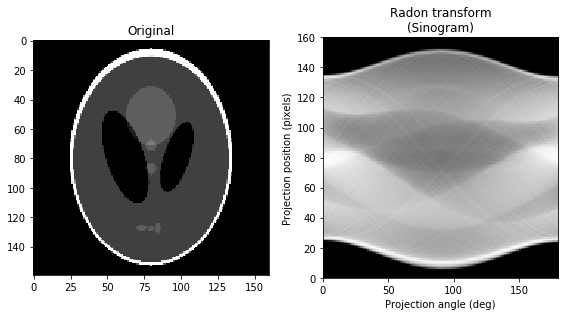

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale

image = imread(data_dir + "/phantom.png", as_gray=True)
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

## 원점에서의 sinogram

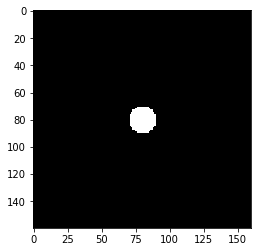

In [97]:
from skimage import draw


img = np.zeros((160, 160), dtype=np.float64)
rr, cc, = draw.circle(int((img.shape[0]) * .5), int(img.shape[0] * .5), 10)
img[rr, cc] = 1
plt.imshow(img, cmap=plt.cm.Greys_r)

<Figure size 432x288 with 0 Axes>

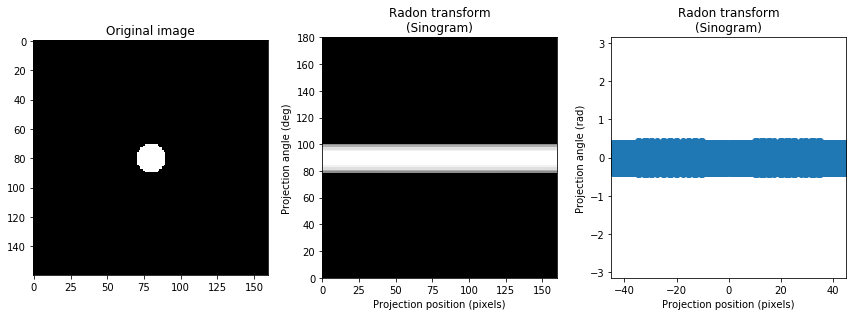

In [99]:
theta = np.linspace(0, 180, max(image.shape), endpoint=False)
sinogram = radon(img, theta=theta, circle=True)
r_count = ((sinogram.nonzero()[1]/80)-1)*45
theta_count = ((sinogram.nonzero()[0]/80)-1)*np.pi
sinogram = radon(img, theta=theta_count, circle=True)
plt.figure()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4.5))

ax1.set_title("Original image")
ax1.imshow(img, cmap = plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)")
ax2.imshow(sinogram,cmap =plt.cm.Greys_r,
           extent = (0, sinogram.shape[0],0,180),aspect ='auto')

ax3.set_xlim([-45,45])
ax3.set_ylim([-np.pi, np.pi])
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (rad)")

plt.scatter(r_count, theta_count)

fig.tight_layout()
plt.show()

In [ ]:
theta

## 옆으로 조금 옮겼을때의 sinogram

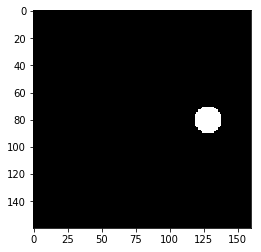

In [89]:

img2 = np.zeros((160, 160), dtype=np.float64)
rr, cc, = draw.circle(int((img2.shape[0]) * .5), int(img2.shape[0] * .8), 10)
img2[rr, cc] = 1
plt.imshow(img2, cmap=plt.cm.Greys_r)

In [90]:
img2.shape

(160, 160)

<Figure size 432x288 with 0 Axes>

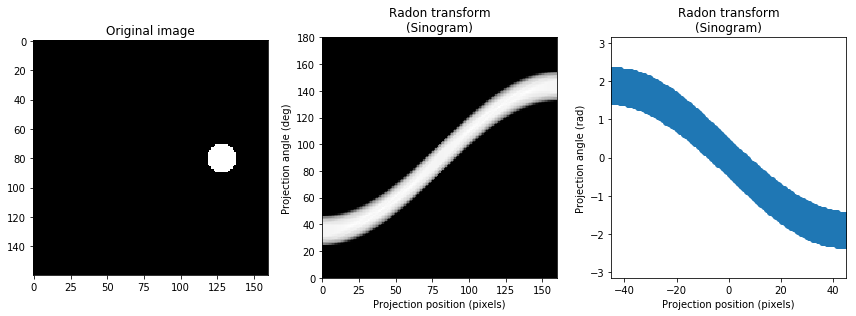

In [94]:
theta = np.linspace(0, 180, max(img2.shape), endpoint=False)
sinogram = radon(img2, theta=theta, circle=True)
r_count = ((sinogram.nonzero()[1]/80)-1)*45.5
theta_count = ((sinogram.nonzero()[0]/80)-1)*np.pi
plt.figure()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4.5))

ax1.set_title("Original image")
ax1.imshow(img2, cmap = plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)")
ax2.imshow(sinogram,cmap =plt.cm.Greys_r,
           extent=(0, sinogram.shape[0],0,180),aspect ='auto')

ax3.set_xlim([-45,45])
ax3.set_ylim([-np.pi, np.pi])
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (rad)")

plt.scatter(r_count, theta_count)

fig.tight_layout()
plt.show()

## 위에 데이터를 가지고 만들기

In [61]:
theta_count = []

for i in range(0,len(c)):
    theta_count.append(c[i][1])
    
theta_count

[0.28639864383287295,
 -0.28639864383287295,
 -0.1292208095990492,
 1.5707963267948966,
 -1.3335895279112526,
 0.5236004884846109,
 -0.1125132696895968,
 -0.6438938560402242,
 -0.7608035467411005,
 0.28639864383287295,
 -0.28639864383287295,
 0.7608035467411005,
 0.7608035467411005,
 -0.7608035467411005,
 0.5236004884846109,
 0.5236004884846109,
 -1.0471974985115713,
 1.3335895279112526,
 1.5707963267948966,
 0.5236004884846109,
 -0.5236004884846109,
 0.0,
 1.5707963267948966,
 0.1125132696895968,
 -0.1292208095990492,
 1.471174457087636,
 -0.1292208095990492,
 1.5707963267948966,
 1.0471974985115713,
 0.7608035467411005,
 0.5236004884846109,
 0.9179775075343741,
 0.5236004884846109,
 -0.6438938560402242,
 0.28639864383287295,
 -0.5236004884846109,
 0.4033074374378385,
 0.4033074374378385,
 -0.7608035467411005,
 0.5236004884846109,
 -1.471174457087636,
 1.0471848490249271,
 -0.7608035467411005,
 1.5707963267948966,
 1.5707963267948966,
 -0.3718929389244348,
 1.5707963267948966,
 -0.643

In [62]:
f=[]
for i in range(0,len(theta_count)):
    f.append(math.floor(theta_count[i]))
    
    
f

[0,
 -1,
 -1,
 1,
 -2,
 0,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 -1,
 0,
 0,
 -2,
 1,
 1,
 0,
 -1,
 0,
 1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 0,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 -1,
 0,
 -2,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 0,
 0,
 0,
 -1,
 0,
 1,
 0,
 1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 1,
 0,
 -2,
 -1,
 1,
 0,
 -2,
 -2,
 0,
 0,
 0,
 -1,
 0,
 1,
 0,
 -1,
 0,
 -1,
 -2,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -2,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 -1,
 -2,
 0,
 1,
 0,
 -2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 -1,
 -2,
 -2,
 -1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -2,
 -1,
 1,
 -1,
 1,
 0,
 1,
 -2,
 1,
 0,
 1,
 1,
 1,
 -2,
 -1,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 1,
 1,
 1,
 1,
 -2,
 -

In [63]:
r_count = []

for i in range(0,len(c)):
    r_count.append(c[i][0])
    
r_count

[0.0,
 0.0,
 27.637982270741862,
 44.904,
 40.53911557921289,
 -10.999757996673754,
 -18.182028302930476,
 -5.460141229733171,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 13.223722924147802,
 40.53911557921289,
 -44.904,
 -10.999757996673752,
 0.0,
 -22.75,
 -44.904,
 18.182028302930476,
 -27.637982270741862,
 36.94597824927404,
 27.637982270741862,
 -33.904,
 13.223722924147804,
 0.0,
 0.0,
 27.637974672613563,
 0.0,
 5.460141229733171,
 0.0,
 39.404116903970554,
 -5.460126932693369,
 5.46012693269337,
 0.0,
 39.404116903970554,
 -36.94597824927404,
 -45.49986500804139,
 0.0,
 -33.904,
 33.904,
 42.38967276737504,
 -39.404,
 5.460141229733171,
 -36.94597824927404,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -33.904,
 44.9039958991122,
 44.904,
 23.405241891472507,
 0.0,
 -5.46012693269337,
 0.0,
 0.0,
 -27.637982270741862,
 33.904,
 0.0,
 45.49986500804139,
 -18.182028302930476,
 45.49986500804139,
 -23.405394676902873,
 45.49986500804139,
 -45.49986500804139,
 0.0,
 -5.46012693269337,


In [64]:
len(c)

8101

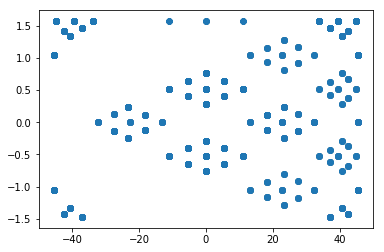

In [65]:
plt.scatter(r_count,theta_count,linewidths=0.1)

In [66]:
import numpy as np

In [67]:
d

45.5

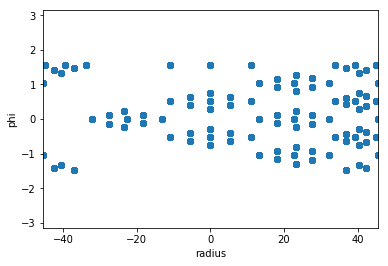

In [68]:
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
 
ax.set_xlim([-d,d])
ax.set_ylim([-np.pi, np.pi])
ax.set_xlabel('radius')
ax.set_ylabel('phi')
plt.scatter(r_count,theta_count)


In [69]:
from sympy import *

In [70]:
def draw_graph(r, phi):
    theta = np.linspace(-np.pi, np.pi, 101)
    r = x* np.cos(phi)+y*np.sin(phi)
    ax.plot(radius)
    

In [71]:
plt.show()

for 문을 통해 리스트에서 꺼내서 집어넣기

In [72]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale


theta = np.linspace(0.,180.,max(image.shape))


In [73]:
from PIL import Image
im = Image.new(mode='1',size=(260,260),color='white')

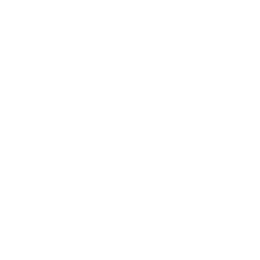

In [74]:
     im

In [75]:
import scipy.integrate as integrate
import scipy.special as special



In [76]:
from PIL import Image 
img = Image.new('RGB', (300,300), (255, 255, 255)) 
img.save("image.png", "PNG") 

In [77]:
im = Image.open('image.png')

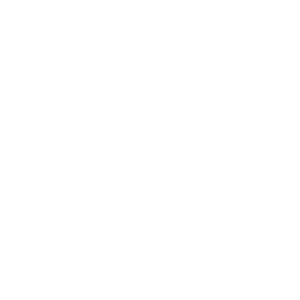

In [78]:
im

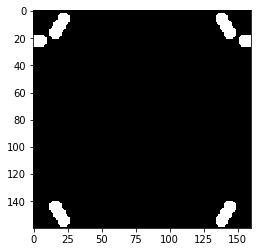

In [82]:

img3 = np.zeros((160, 160), dtype=np.float64)
for i in range(0,len(ave_xyz_final)):
    for j in range(0,1):
        rr, cc, = draw.circle(int(float(ave_xyz_final[:][i][j][0]) * .5), int(float(ave_xyz_final[:][i][j][1]) * .5), 5)
        img3[rr, cc] = 1

plt.imshow(img3, cmap=plt.cm.Greys_r)

c:\users\bravehong\appdata\local\programs\python\python37\lib\site-packages\skimage\transform\radon_transform.py:69: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


<Figure size 432x288 with 0 Axes>

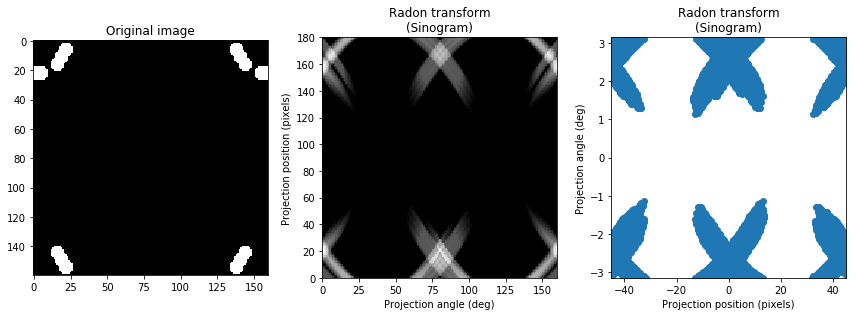

In [80]:
theta = np.linspace(0, 180, max(img3.shape), endpoint=False)
sinogram = radon(img3, theta=theta, circle=True)

r_count = ((sinogram.nonzero()[1]/80)-1)*45.5
theta_count = ((sinogram.nonzero()[0]/80)-1)*np.pi


plt.figure()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4.5))

ax1.set_title("Original image")
ax1.imshow(img3, cmap = plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_ylabel("Projection position (pixels)")
ax2.set_xlabel("Projection angle (deg)")
ax2.imshow(sinogram,cmap =plt.cm.Greys_r,
           extent=(0, sinogram.shape[0],0,180),aspect ='auto')

ax3.set_xlim([-45,45])
ax3.set_ylim([-np.pi, np.pi])
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (deg)")

plt.scatter(r_count, theta_count)

fig.tight_layout()
plt.show()